In [121]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### EDA Section

In [2]:
df = pd.read_csv("/Users/eudieentela/Downloads/canada_rent.csv")

In [3]:
df.head(5)

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
0,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
1,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2695.0,3 Beds,2.5,1496,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
2,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2295.0,2 Beds,2.5,1180,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
3,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2095.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,November 18,Non-Smoking,True,True
4,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True


#### Clean and Process the Data - Removing null values, imputing missing values, find correct columns

In [6]:
df.isnull().sum()

rentfaster_id           0
city                    0
province                0
address               125
latitude                0
longitude               0
lease_term             46
type                    0
price                   0
beds                  132
baths                 134
sq_feet              4112
link                    0
furnishing              0
availability_date      12
smoking              2702
cats                  173
dogs                  173
dtype: int64

In [7]:
#Remove non-numeric characters from beds and replace null values with 0
df['beds'] = df['beds'].str.extract('(\d+)', expand=False)
df['beds'] = df['beds'].fillna(0)
df['beds'].replace('none Beds', 0, inplace=True)
df['beds'] = df['beds'].astype(int)

In [8]:
df.beds.unique()

array([2, 3, 0, 1, 5, 4, 6, 8, 7, 9])

In [9]:
#Replace all NaN and none values with 0 and convert to float

df['baths'].replace('none', 0, inplace=True)
df['baths'] = df['baths'].fillna(0)
df['baths'] = df['baths'].astype(float)

In [10]:
df.baths.unique()

array([2.5, 1. , 2. , 1.5, 3.5, 0. , 4. , 3. , 5. , 4.5, 7.5, 5.5, 6. ,
       6.5, 7. , 8. ])

In [11]:
#Remove non-numeric characters from sq_feet and replace null values with average sq_feet
df['sq_feet'] = df['sq_feet'].str.extract('(\d+)', expand=False)
df['sq_feet'] = df['sq_feet'].fillna(0)
df['sq_feet'] = df['sq_feet'].astype(int)
avg_sqf = df['sq_feet'].mean()
df['sq_feet'].replace(0, avg_sqf, inplace=True)

In [12]:
df.head(5)

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
0,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2,2.5,1403.0,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
1,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2695.0,3,2.5,1496.0,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
2,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2295.0,2,2.5,1180.0,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
3,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2095.0,2,2.5,1403.0,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,November 18,Non-Smoking,True,True
4,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2,2.5,1403.0,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True


In [13]:
df.isnull().sum()

#Null value for beds, baths, and sq_feet have been filled. These columns will be used for predicting

rentfaster_id           0
city                    0
province                0
address               125
latitude                0
longitude               0
lease_term             46
type                    0
price                   0
beds                    0
baths                   0
sq_feet                 0
link                    0
furnishing              0
availability_date      12
smoking              2702
cats                  173
dogs                  173
dtype: int64

In [14]:
df = df[['price','beds', 'baths', 'sq_feet']]
df.head()

,price,beds,baths,sq_feet
0,2495.0,2,2.5,1403.0
1,2695.0,3,2.5,1496.0
2,2295.0,2,2.5,1180.0
3,2095.0,2,2.5,1403.0
4,2495.0,2,2.5,1403.0


<Axes: >

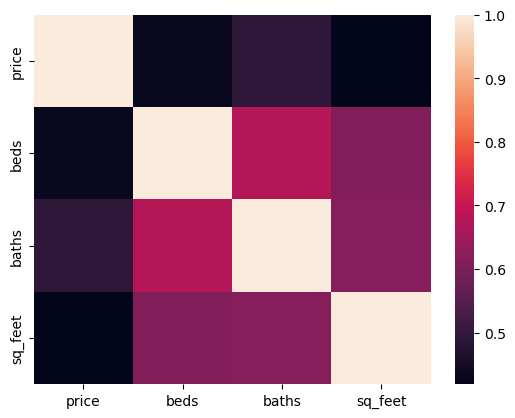

In [15]:
sns.heatmap(df.corr())

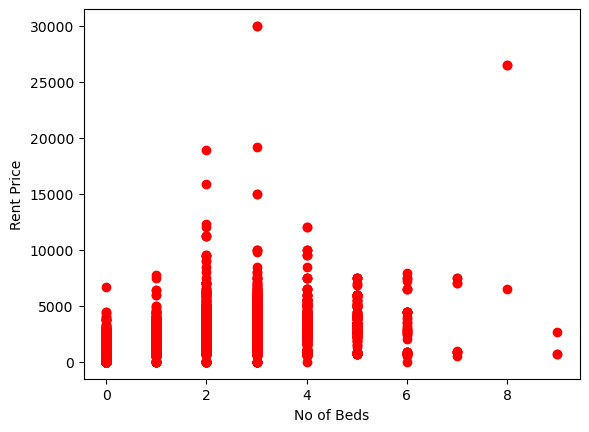

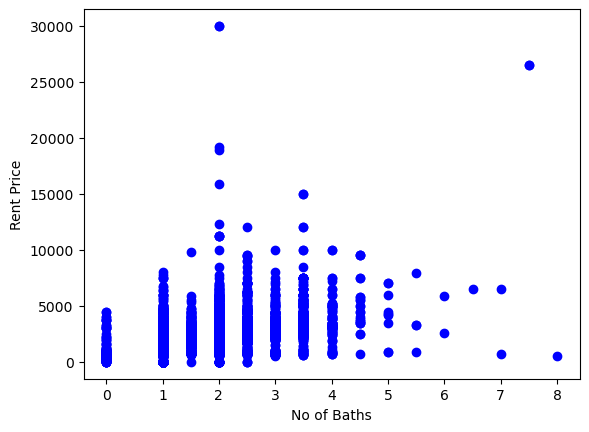

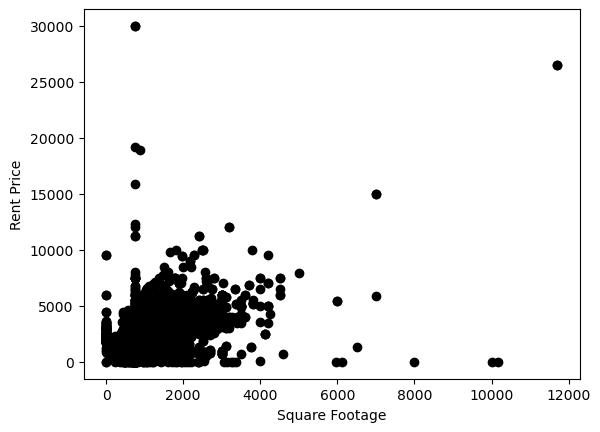

In [16]:
plt.scatter(df['beds'], df['price'], color='red')
plt.xlabel("No of Beds")
plt.ylabel("Rent Price")
plt.show()

plt.scatter(df['baths'], df['price'], color='blue')
plt.xlabel("No of Baths")
plt.ylabel("Rent Price")
plt.show()

plt.scatter(df['sq_feet'], df['price'], color='black')
plt.xlabel("Square Footage")
plt.ylabel("Rent Price")
plt.show()

## Regression Models

### Simple Linear Regression 

Prep Data for Model Purposes

In [17]:
X = df[['sq_feet']] # - Independant Variable
y = df[['price']] # - Dependant Variable

Split the Data into Two Parts: Training and Testing

In [18]:
from sklearn.model_selection import train_test_split

#Train / Test Split using 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) #20% for test

Creating an Instance of the Model (LinearRegression)

In [19]:
from sklearn.linear_model import LinearRegression

#Creating an instance of the model with the desired parameters
simple = LinearRegression()

Fitting the Model

In [20]:
#Train the model by calling the fit method on the training data
simple.fit(X_train, y_train)

LinearRegression()

In [21]:
#Testing the trained model by calling the predict method on X_Test data

y_pred = simple.predict(X_test)

Evaluation / Accuracy Metrics

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

#Compare the y values with the original y_test values

slr_MAE = mean_absolute_error(y_test, y_pred)
slr_MSE = mean_squared_error(y_test, y_pred)
slr_RMSE = np.sqrt(slr_MSE)

slr_MAE, slr_MSE, slr_RMSE

(563.163917901345, 737318.9579355199, 858.6727886311058)

In [23]:
print("Model slope:    ", simple.coef_[0])
print("Model intercept:", simple.intercept_)

Model slope:     [0.92064668]
Model intercept: [1334.65118693]


### Multiple Linear Regression 

In [25]:
X = df.drop('price', axis=1) # Features are Bed, Bath and Sq Feet
y = df['price'] #Target is the price

In [26]:
from sklearn.model_selection import train_test_split

#Train/Test Split with a 20%test and 80% train split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [27]:
from sklearn.linear_model import LinearRegression

#Creating the instance

multiple = LinearRegression()

In [28]:
# Train model

multiple.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = multiple.predict(X_test)

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mlr_MAE = mean_absolute_error(y_test, y_pred)
mlr_MSE = mean_squared_error(y_test, y_pred)
mlr_RMSE = np.sqrt(mlr_MSE)

mlr_MAE, mlr_MSE, mlr_RMSE

(525.4425120088287, 638049.7962624806, 798.7801927079067)

### Polynomial Linear Regression

In [36]:
X = df.drop('price', axis=1)
y = df['price']

In [58]:
from sklearn.preprocessing import PolynomialFeatures

# Create an instance of PolynomialFeatures

poly_converter = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly_converter.fit_transform(X)

In [59]:
X.shape, poly_features.shape

#X changed to 9 because degree of freedom is 2

((25771, 3), (25771, 9))

In [60]:
# Train/test split
# Instead of using X, we will use poly_features

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=1)

In [61]:
from sklearn.linear_model import LinearRegression

plr_model = LinearRegression()

In [62]:
# Train regression model on 9 features instead of 3

plr_model.fit(X_train, y_train)

LinearRegression()

In [63]:
y_pred = plr_model.predict(X_test)

In [65]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Obtain metrics

plr_MAE = mean_absolute_error(y_test, y_pred)
plr_MSE = mean_squared_error(y_test, y_pred)
plr_RMSE = np.sqrt(plr_MSE)

plr_MAE, plr_MSE, plr_RMSE

(516.9207190706421, 622499.1457994538, 788.9861505751884)

In [66]:
print(plr_model.coef_)
print(plr_model.intercept_)

[ 3.94657584e+02  7.02274416e+02 -6.45527397e-01 -9.91300795e+01
  3.89064584e+01  1.38061329e-01 -1.25681089e+02  1.35039632e-01
  6.59495458e-05]
1125.2187685070458


In [67]:
from sklearn.preprocessing import StandardScaler

# List to save RMSE for training data
train_rmse_errors = []
# List to save RMSE for testing data
test_rmse_errors = []
# List to save degrees
degrees = []

# Loop over polynomial degrees
for d in range(1, 16):  # Compare polynomial degrees from 1 to 15
    # Create poly features for each degree "d"
    polynomial2_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly2_features = polynomial2_converter.fit_transform(X)
    
    # Split dataset into train/test split
    X_train, X_test, y_train, y_test = train_test_split(poly2_features, y, test_size=0.1, random_state=1)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Create and train the final model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    
    # Get predictions for both train and test data
    train_pred = model.predict(X_train_scaled)
    test_pred = model.predict(X_test_scaled)
    
    # Calculate RMSE for training set
    train_RMSE = np.sqrt(mean_squared_error(y_train, train_pred))
    
    # Calculate RMSE for testing set
    test_RMSE = np.sqrt(mean_squared_error(y_test, test_pred))
    
    # Store errors and degrees to lists
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)
    degrees.append(d)

# Create df with RMSE scores + degrees
results_df = pd.DataFrame({
    'Degree': degrees,
    'Train RMSE': train_rmse_errors,
    'Test RMSE': test_rmse_errors
})

results_df

,Degree,Train RMSE,Test RMSE
0,1,836.880567,7.747114e+02
1,2,807.251880,7.663061e+02
2,3,801.988140,7.593291e+02
3,4,792.517812,7.793167e+02
4,5,782.787335,7.766799e+02
5,6,776.162633,1.329425e+03
6,7,765.658813,1.550128e+04
7,8,757.603169,6.798641e+04
8,9,748.631000,5.549851e+09
9,10,743.131431,2.999457e+10


In [46]:
#From the results of the table above, the should stick to a degree of 3.

In [47]:
# Create polynomial features with degree of 3
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)
poly_features = final_poly_converter.fit_transform(X)

# Scale the features
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(poly_features)

final_polynomial = LinearRegression()
final_polynomial.fit(X_poly_scaled, y)

LinearRegression()

In [48]:
import joblib

joblib.dump(final_polynomial, "final_model.joblib")
joblib.dump(final_poly_converter, "polynomial_converter.joblib")
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

In [49]:
new_predict3 = [[3,2.5,1500]]

In [72]:
# Load the model and preprocessors (if saved)
final_model = joblib.load("final_model.joblib")
polynomial_converter = joblib.load("polynomial_converter.joblib")
scaler = joblib.load("scaler.joblib")

new_predict3_poly = polynomial_converter.transform(new_predict3)
new_predict3_scaled = scaler.transform(new_predict3_poly)

# Make predictions
prediction3 = final_model.predict(new_predict3_scaled)
print("Predicted PLR Rent Price:", prediction3)

Predicted PLR Rent Price: [2985.18194771]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


### K-Fold Cross-Validation

In [76]:
X = df.drop('price', axis=1)
y = df['price']

In [77]:
# Standard train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scale data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [79]:
from sklearn.linear_model import Ridge

# Bad alpha choice on purpose
bad_model = Ridge(alpha=100)

In [80]:
# Import cross_val_score
from sklearn.model_selection import cross_validate

In [81]:
# Select multiple evaluation metrics
scores = cross_validate(bad_model, scaled_X_train, y_train,
                         scoring=['neg_mean_absolute_error','neg_mean_squared_error','max_error'],cv=5)

In [82]:
scores

{'fit_time': array([0.00658894, 0.0029192 , 0.00234318, 0.00179267, 0.00209212]),
 'score_time': array([0.00129104, 0.00123692, 0.00088191, 0.00165224, 0.00077677]),
 'test_neg_mean_absolute_error': array([-531.25740274, -527.95486446, -528.93135714, -536.00466653,
        -531.02556154]),
 'test_neg_mean_squared_error': array([-595570.47164873, -615041.72608944, -819878.51258191,
        -692976.81763335, -803881.59730519]),
 'test_max_error': array([ -9418.01150817,  -9687.00734433, -27488.6566198 , -17425.98982726,
        -27446.02853767])}

In [83]:
pd.DataFrame(scores)

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_max_error
0,0.006589,0.001291,-531.257403,-595570.471649,-9418.011508
1,0.002919,0.001237,-527.954864,-615041.726089,-9687.007344
2,0.002343,0.000882,-528.931357,-819878.512582,-27488.656620
3,0.001793,0.001652,-536.004667,-692976.817633,-17425.989827
4,0.002092,0.000777,-531.025562,-803881.597305,-27446.028538


In [84]:
#ADJUST MODEL

In [95]:
adjust_model = Ridge(alpha=3)

In [96]:
# Select multiple evaluation metrics
scores = cross_validate(adjust_model, scaled_X_train, y_train,
                         scoring=['neg_mean_absolute_error','neg_mean_squared_error','max_error'],cv=5)

pd.DataFrame(scores).mean()

fit_time                             0.003469
score_time                           0.002141
test_neg_mean_absolute_error      -531.137942
test_neg_mean_squared_error    -705485.857859
test_max_error                  -18287.254274
dtype: float64

In [97]:
adjust_model.fit(scaled_X_train , y_train)

Ridge(alpha=3)

In [99]:
final_y = adjust_model.predict(scaled_X_test)

# Obtain metrics
cross_MAE = mean_absolute_error(y_test, final_y)
cross_MSE = mean_squared_error(y_test, final_y)
cross_RMSE = np.sqrt(cross_MSE)

cross_MAE, cross_MSE, cross_RMSE

(525.4399607848477, 638049.2434158092, 798.7798466510088)

In [100]:
print('SIMPLE LINEAR REGRESSION:',slr_MAE, slr_MSE, slr_RMSE)
print('MUTIPLE LINEAR REGRESSION:',mlr_MAE, mlr_MSE, mlr_RMSE)
print('POLYNOMIAL LINEAR REGRESSION:',plr_MAE, plr_MSE, plr_RMSE)
print('CROSS-VALIDATION:',cross_MAE, cross_MSE, cross_RMSE)

SIMPLE LINEAR REGRESSION: 563.163917901345 737318.9579355199 858.6727886311058
MUTIPLE LINEAR REGRESSION: 525.4425120088287 638049.7962624806 798.7801927079067
POLYNOMIAL LINEAR REGRESSION: 516.9207190706421 622499.1457994538 788.9861505751884
CROSS-VALIDATION: 525.4399607848477 638049.2434158092 798.7798466510088


### Explanation

In the case of this data, I have chosen to go with Multiple Linear Regression. The MLR Model seems to be the best model at predicting the test set points in this case of data while doing the k-fold cross-validation. I have chosen to use the bed, bath and square footage as the features because they are typically some features that contribute to the final pricing of certain house totals or renting totals along with the area it is in.


### Final Model 

In [102]:
X = df.drop('price', axis=1)
y = df['price']

In [112]:
final_model = LinearRegression()

final_model.fit(X, y)

LinearRegression()

In [113]:
# Obtain coefficients for X features
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
beds,130.345041
baths,457.183549
sq_feet,0.322413


In [117]:
new_rent_unit = [[3, 2.5, 1500]] #3 Beds, 2.5 Baths, 1500 sqft
new_rent_unit2 = [[2, 1, 900]] #2 Beds, 1 Bath, 900 sqft
new_rent_unit3 = [[3, 1, 1100]] #3 Beds, 1 Baths, 1100 sqft

In [120]:
print('3 Beds, 2.5 Baths, 1500 sqft ---> Predicted Rent Price in $:', final_model.predict(new_rent_unit))
print('2 Beds, 1 Bath, 900 sqft ---> Predicted Rent Price in $:', final_model.predict(new_rent_unit2))
print('3 Beds, 1 Baths, 1100 sqft ---> Predicted Rent Price in $:', final_model.predict(new_rent_unit3))

3 Beds, 2.5 Baths, 1500 sqft ---> Predicted Rent Price in $: [3014.08147111]
2 Beds, 1 Bath, 900 sqft ---> Predicted Rent Price in $: [2004.51322301]
3 Beds, 1 Baths, 1100 sqft ---> Predicted Rent Price in $: [2199.34089171]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
